In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
# Step 2: Load and Inspect the Dataset
df = pd.read_csv(r'C:\Users\hr157\Downloads\Housing\Housing.csv')  # Replace with your dataset path
print(df.head())
print(df.info())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [6]:
# Step 3: Preprocess the Data
# Handle missing values, select numeric columns
df = df.dropna()
features = ['area', 'bedrooms', 'bathrooms']
target = 'price'

X = df[features]
y = df[target]


In [7]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Step 5: Train the Model
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [9]:
# Step 6: Evaluate the Model
y_pred = lr.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 1265275.6699454375
MSE: 2750040479309.0513
R² Score: 0.45592991188724474


In [16]:
# Step 7: Plotting (for Simple Regression)
if X.shape[1] == 1:
    plt.scatter(X_test, y_test, color='blue')
    plt.plot(X_test, y_pred, color='red')
    plt.xlabel(features[0])
    plt.ylabel('SalePrice')
    plt.title('Linear Regression Line')
    plt.show()


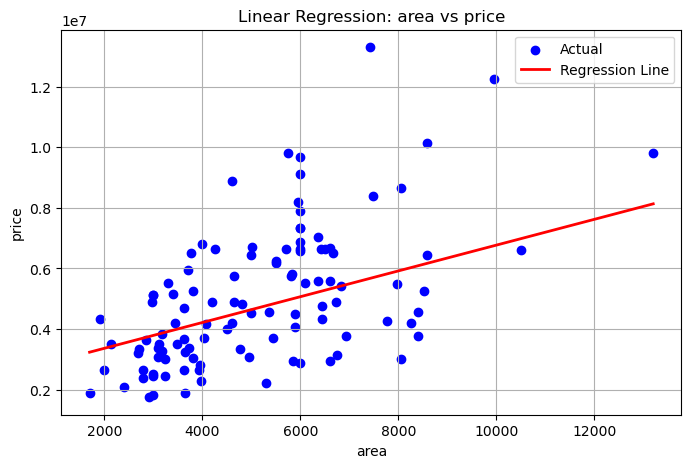

In [31]:
# Plot (Only for Simple Linear Regression)
if len(features) == 1:
    plt.figure(figsize=(8, 5))
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    
    # Sort values for line plot
    sorted_idx = X_test[features[0]].argsort()
    x_sorted = X_test[features[0]].iloc[sorted_idx]
    y_sorted = y_pred[sorted_idx]
    
    plt.plot(x_sorted, y_sorted, color='red', linewidth=2, label='Regression Line')
    plt.xlabel(features[0])
    plt.ylabel(target)
    plt.title(f'Linear Regression: {features[0]} vs {target}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [11]:
# Step 8: Interpret Coefficients
print("Intercept:", lr.intercept_)
for i, col in enumerate(features):
    print(f"Coefficient for {col}: {lr.coef_[i]}")


Intercept: 59485.37920871563
Coefficient for area: 345.4665700831112
Coefficient for bedrooms: 360197.65045750595
Coefficient for bathrooms: 1422319.6576414115
